The following Notebook has been used for step by step debugging

In [1]:
import src.unconstrained_min as um
import src.utils as utils
import tests.examples as examples
import numpy as np

1. TEST THE EXAMPLES 

In [2]:
x = np.array([1.0, 2.0])

#test quad_circle
f, grad, hess = examples.quad_circle(x, need_hessian=True)
print("Function value:", f)
print("Gradient:", grad)
print("Hessian:\n", hess)



Function value: 5.0
Gradient: [2. 4.]
Hessian:
 [[2. 0.]
 [0. 2.]]


In [3]:
#test quad_elipse
print("Quad ellipse with x = [1.0, 2.0]")  
f, grad, hess = examples.quad_ellipse(x, need_hessian=True)
print("Function value:", f)
print("Gradient:", grad)
print("Hessian:\n", hess)

#test quad_rotated_ellipse
print("Quad rotated ellipse with x = [1.0, 2.0]")
f, grad, hess = examples.quad_rotated_ellipse(x, need_hessian=True)
print("Function value:", f)
print("Gradient:", grad)
print("Hessian:\n", hess)

#test rosenbrock
print("Rosenbrock with x = [1.0, 2.0]")
f, grad, hess = examples.rosenbrock(x, need_hessian=True)
print("Function value:", f)
print("Gradient:", grad)
print("Hessian:\n", hess)

#test linear 
print("Linear with x = [1.0, 2.0]")
f, grad, hess = examples.linear(x, need_hessian=False)
print("Function value:", f)
print("Gradient:", grad)
print("Hessian:\n", hess)

#test smooth_triangle
print("Smooth triangle with x = [1.0, 2.0]")
f, grad, hess = examples.smooth_triangle(x, need_hessian=True)
print("Function value:", f)
print("Gradient:", grad)
print("Hessian:\n", hess)




Quad ellipse with x = [1.0, 2.0]
Function value: 401.0
Gradient: [  2. 400.]
Hessian:
 [[  2   0]
 [  0 200]]
Quad rotated ellipse with x = [1.0, 2.0]
Function value: 6.776970050681143
Gradient: [-20.97302995  17.26348503]
Hessian:
 [[150.5        -85.73651497]
 [-85.73651497  51.5       ]]
Rosenbrock with x = [1.0, 2.0]
Function value: 100.0
Gradient: [-400.  200.]
Hessian:
 [[ 402. -400.]
 [-400.  200.]]
Linear with x = [1.0, 2.0]
Function value: 247.0
Gradient: [  1. 123.]
Hessian:
 None
Smooth triangle with x = [1.0, 2.0]
Function value: 992.6136834352898
Gradient: [ 991.94794127 2976.80585658]
Hessian:
 [[ 992.61368344 2976.80585658]
 [2976.80585658 8930.52731116]]


2.TEST THE MINIMIZATION

In [4]:
from tests.examples import quad_circle, quad_ellipse, quad_rotated_ellipse, rosenbrock, linear, smooth_triangle

In [5]:
functions = [
    ("Quad Circle", quad_circle, [1.0, 1.0]),
    ("Quad Ellipse", quad_ellipse, [1.0, 1.0]),
    ("Quad Rotated Ellipse", quad_rotated_ellipse, [1.0, 1.0]),
    ("Rosenbrock", rosenbrock, [-1.0, 2.0]),
    ("Linear", linear, [1.0, 1.0]),
    ("Smooth Triangle", smooth_triangle, [1.0, 1.0])
]

results = []
for name, func, x0 in functions[3:]:
    max_iter = 10000 if name == "Rosenbrock" else 100
    print(f"\n🔍 Testing Gradient Descent on: {name} with x0 = {x0}")
    x_final, f_final, success, x_path, f_path = um.minimize(f=func, x0=x0, method='GD',
                                                                 obj_tol=1e-12, param_tol=1e-8, max_iter=max_iter)
    print(f"Final x: {x_final}")
    print(f"Final function value: {f_final}")
    print(f"Success: {success}")
    print(f"Iterations: {len(x_path)-1}")
    results.append((name, x_final, f_final, success, len(x_path)-1))
                                                             



🔍 Testing Gradient Descent on: Rosenbrock with x0 = [-1.0, 2.0]
Iter 1: x = [-1.38671875  1.8046875 ], f(x) = 7.095948317088187
Iter 2: x = [-1.31797486  1.82779324], f(x) = 6.196300595970412
Iter 3: x = [-1.36016128  1.81007146], f(x) = 5.730099416215155
Iter 4: x = [-1.33431647  1.81787757], f(x) = 5.589486843108889
Iter 5: x = [-1.34929099  1.81055782], f(x) = 5.5292249126781225
Iter 6: x = [-1.33941692  1.81251648], f(x) = 5.507018115911156
Iter 7: x = [-1.34451603  1.80890734], f(x) = 5.496895602978407
Iter 8: x = [-1.34055873  1.80867609], f(x) = 5.491621071183902
Iter 9: x = [-1.34205041  1.80641469], f(x) = 5.488025463217088
Iter 10: x = [-1.33847482  1.80433837], f(x) = 5.4849087583840435
Iter 11: x = [-1.34061216  1.80183378], f(x) = 5.48057467678038
Iter 12: x = [0.87773852 0.88327071], f(x) = 1.2883652213146355
Iter 13: x = [0.95559822 0.83919032], f(x) = 0.5492405239481002
Iter 14: x = [0.90054284 0.86808783], f(x) = 0.33605183478537787
Iter 15: x = [0.94111133 0.84577907

Iter 221: x = [0.93938493 0.88187503], f(x) = 0.003706564485276685
Iter 222: x = [0.93920411 0.8820973 ], f(x) = 0.0036961452338400984
Iter 223: x = [0.93943641 0.88210006], f(x) = 0.003687371208098907
Iter 224: x = [0.93934953 0.88227221], f(x) = 0.0036795887424235013
Iter 225: x = [0.93966876 0.8823545 ], f(x) = 0.0036786565192944843
Iter 226: x = [0.93944716 0.88259782], f(x) = 0.0036667817471327134
Iter 227: x = [0.93971074 0.88258342], f(x) = 0.0036571535626042785
Iter 228: x = [0.9395991  0.88276813], f(x) = 0.003648882160218869
Iter 229: x = [0.93977754 0.88279873], f(x) = 0.0036414204578989473
Iter 230: x = [0.9396855  0.88309802], f(x) = 0.003638633470012224
Iter 231: x = [0.93998657 0.88306318], f(x) = 0.003627781828579359
Iter 232: x = [0.93984532 0.88326302], f(x) = 0.00361879896345092
Iter 233: x = [0.94004637 0.88328107], f(x) = 0.003610930313319324
Iter 234: x = [0.93998231 0.8834397 ], f(x) = 0.003603736888540248
Iter 235: x = [0.94026461 0.88353896], f(x) = 0.003599517

In [6]:
functions = [
    ("Quad Circle", quad_circle, [1.0, 1.0]),
    ("Quad Ellipse", quad_ellipse, [1.0, 1.0]),
    ("Quad Rotated Ellipse", quad_rotated_ellipse, [1.0, 1.0]),
    ("Rosenbrock", rosenbrock, [-1.0, 2.0]),
    #("Linear", linear, [1.0, 1.0]),
    ("Smooth Triangle", smooth_triangle, [1.0, 1.0])
]
results = []
for name, func, x0 in functions[3:]:
    print(f"\n🔍 Testing Gradient Descent on: {name} with x0 = {x0}")
    x_final, f_final, success, x_path, f_path = um.minimize(f=func, x0=x0, method='NT',
                                                                 obj_tol=1e-12, param_tol=1e-8, max_iter=100)
    print(f"Final x: {x_final}")
    print(f"Final function value: {f_final}")
    print(f"Success: {success}")
    print(f"Iterations: {len(x_path)-1}")
    results.append((name, x_final, f_final, success, len(x_path)-1))


🔍 Testing Gradient Descent on: Rosenbrock with x0 = [-1.0, 2.0]
Iter 1: x = [-1.01005025  1.0201005 ], f(x) = 4.040303032827961
Iter 2: x = [-0.76376922  0.52260069], f(x) = 3.479849764878305
Iter 3: x = [-0.62962745  0.37843671], f(x) = 2.6880640731420025
Iter 4: x = [-0.45244792  0.16431953], f(x) = 2.2727368764610283
Iter 5: x = [-0.29245002  0.05992768], f(x) = 1.7359596139391382
Iter 6: x = [-0.08126075 -0.0379976 ], f(x) = 1.3680488880692876
Iter 7: x = [ 0.02773532 -0.0111109 ], f(x) = 0.9594123903784412
Iter 8: x = [0.17173064 0.00281669], f(x) = 0.7571842229388527
Iter 9: x = [0.30247674 0.07439764], f(x) = 0.5157610322859135
Iter 10: x = [0.46032641 0.18698389], f(x) = 0.35333086820221915
Iter 11: x = [0.550523   0.29494015], f(x) = 0.20864808407403557
Iter 12: x = [0.72161644 0.49145732], f(x) = 0.16318804950061488
Iter 13: x = [0.76222915 0.57934388], f(x) = 0.056807028373651154
Iter 14: x = [0.85162486 0.71644861], f(x) = 0.02978787842397451
Iter 15: x = [0.90532059 0.816

GD unit tests

In [7]:
# Test GD on quad_circle
res = um.minimize(quad_circle, [1.0, 1.0], method='GD')
assert res[2] == True, "GD on quad_circle did not converge"
assert np.allclose(res[0], [0.0, 0.0], atol=1e-4), "GD on quad_circle did not reach minimum"

# Test GD on smooth_triangle
res = um.minimize(smooth_triangle, [1.0, 1.0], method='GD')
assert res[2] == True, "GD on smooth_triangle did not converge"
assert res[1] > 0, "GD on smooth_triangle gave non-positive objective"

# Test GD on rosenbrock (10,000 iterations allowed)
res = um.minimize(rosenbrock, [-1.0, 2.0], method='GD', max_iter=10000)
assert res[2] == True, "GD on rosenbrock did not converge"
assert res[1] < 1.0, "GD on rosenbrock did not reduce function value enough"


Iter 1: x = [0. 0.], f(x) = 0.0
Iter 2: x = [0. 0.], f(x) = 0.0
Iter 2: x = [0. 0.], f(x) = 0.0
Iter 1: x = [ 0.61568723 -0.15499983], f(x) = 4.207136986647966
Iter 2: x = [0.41384817 0.14767997], f(x) = 3.608627075453059
Iter 3: x = [ 0.26308263 -0.08722509], f(x) = 3.1308608545504826
Iter 4: x = [0.04560727 0.14644056], f(x) = 2.9443621119684376
Iter 5: x = [-0.10631371 -0.1757425 ], f(x) = 2.8649258886679885
Iter 6: x = [-0.21284603  0.16107548], f(x) = 2.756312577024725
Iter 7: x = [-0.27752021 -0.11442151], f(x) = 2.646947032467596
Iter 8: x = [-0.30982554  0.06556123], f(x) = 2.58675525676084
Iter 9: x = [-0.32480423 -0.03298525], f(x) = 2.566281496179305
Iter 10: x = [-0.33257003  0.0156242 ], f(x) = 2.5609434243814504
Iter 11: x = [-0.33722825 -0.00719375], f(x) = 2.559679258800953
Iter 12: x = [-0.34025555  0.00326033], f(x) = 2.559379374937506
Iter 13: x = [-0.34228446 -0.00146302], f(x) = 2.5593026160538344
Iter 14: x = [-0.34365814  0.00065219], f(x) = 2.559280029823891
Ite

In [8]:
# Test NT on quad_ellipse
res = um.minimize(quad_ellipse, [1.0, 1.0], method='NT')
assert res[2] == True, "NT on quad_ellipse did not converge"
assert np.allclose(res[0], [0.0, 0.0], atol=1e-4), "NT on quad_ellipse did not reach minimum"

# Test NT on quad_rotated_ellipse
res = um.minimize(quad_rotated_ellipse, [1.0, 1.0], method='NT')
assert res[2] == True, "NT on rotated ellipse did not converge"
assert res[1] < 1e-6, "NT on rotated ellipse final function value too high"

# Test NT on rosenbrock
res = um.minimize(rosenbrock, [-1.0, 2.0], method='NT')
assert res[2] == True, "NT on rosenbrock did not converge"
assert res[1] < 1.0, "NT on rosenbrock final function value too high"


Iter 1: x = [0. 0.], f(x) = 0.0
Iter 2: x = [0. 0.], f(x) = 0.0
Iter 2: x = [0. 0.], f(x) = 0.0
Iter 1: x = [3.33066907e-16 5.55111512e-16], f(x) = 4.308200561857271e-31
Iter 2: x = [2.95822839e-31 4.93038066e-31], f(x) = 3.3985709951003985e-61
Iter 2: x = [2.95822839e-31 4.93038066e-31], f(x) = 3.3985709951003985e-61
Iter 1: x = [-1.01005025  1.0201005 ], f(x) = 4.040303032827961
Iter 2: x = [-0.76376922  0.52260069], f(x) = 3.479849764878305
Iter 3: x = [-0.62962745  0.37843671], f(x) = 2.6880640731420025
Iter 4: x = [-0.45244792  0.16431953], f(x) = 2.2727368764610283
Iter 5: x = [-0.29245002  0.05992768], f(x) = 1.7359596139391382
Iter 6: x = [-0.08126075 -0.0379976 ], f(x) = 1.3680488880692876
Iter 7: x = [ 0.02773532 -0.0111109 ], f(x) = 0.9594123903784412
Iter 8: x = [0.17173064 0.00281669], f(x) = 0.7571842229388527
Iter 9: x = [0.30247674 0.07439764], f(x) = 0.5157610322859135
Iter 10: x = [0.46032641 0.18698389], f(x) = 0.35333086820221915
Iter 11: x = [0.550523   0.29494015]

In [9]:
from src.unconstrained_min import minimize
from src.utils import plot_contours_with_paths, plot_function_values

In [10]:
x0 = np.array([1.0, 1.0])
x0_ros = np.array([-1.0, 2.0])

Iter 1: x = [0. 0.], f(x) = 0.0
Iter 2: x = [0. 0.], f(x) = 0.0
Iter 2: x = [0. 0.], f(x) = 0.0
Iter 1: x = [0. 0.], f(x) = 0.0
Iter 2: x = [0. 0.], f(x) = 0.0
Iter 2: x = [0. 0.], f(x) = 0.0


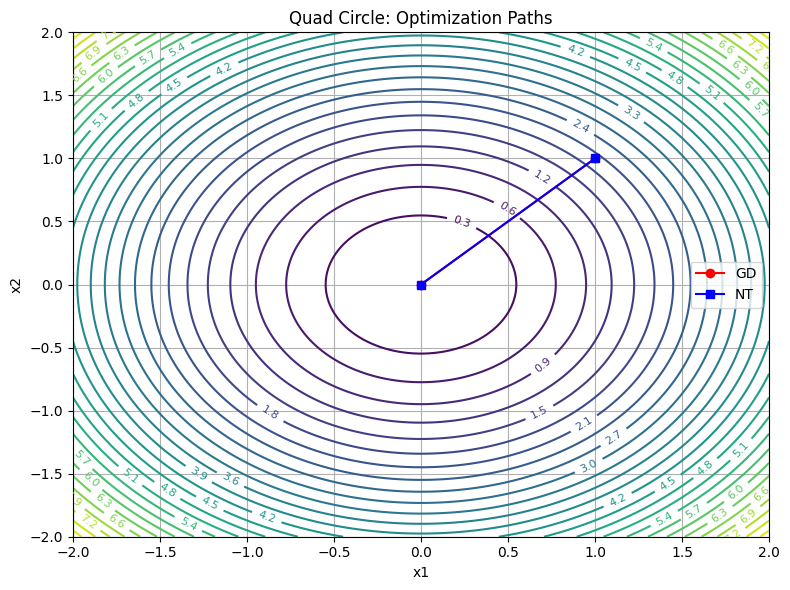

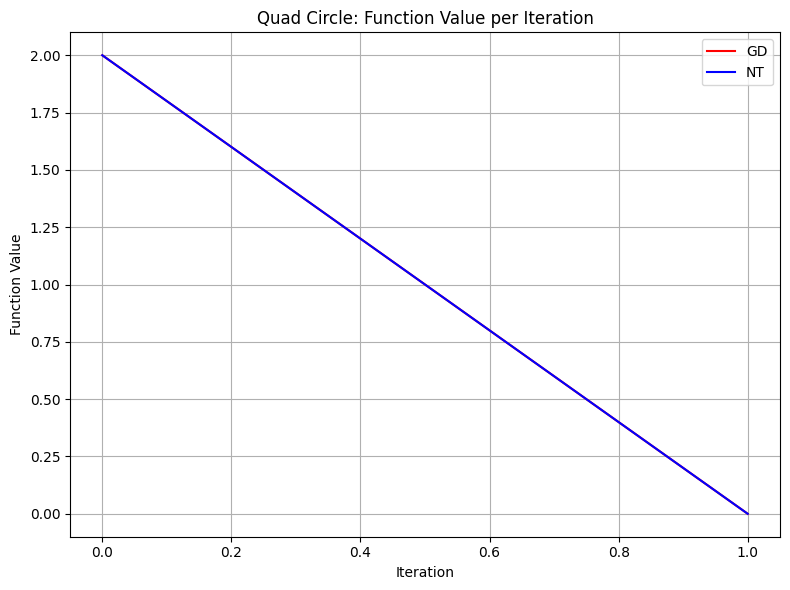

In [11]:
res_gd = minimize(quad_circle, x0, method='GD')
res_nt = minimize(quad_circle, x0, method='NT')

plot_contours_with_paths(
    f=quad_circle,
    xlim=(-2, 2),
    ylim=(-2, 2),
    paths=[res_gd[3], res_nt[3]],
    labels=["GD", "NT"],
    title="Quad Circle: Optimization Paths"
)

plot_function_values(
    f_paths=[res_gd[4], res_nt[4]],
    labels=["GD", "NT"],
    title="Quad Circle: Function Value per Iteration"
)

Iter 1: x = [ 0.984375 -0.5625  ], f(x) = 32.609619140625
Iter 2: x = [0.96899414 0.31640625], f(x) = 10.950241148471832
Iter 3: x = [ 0.95385361 -0.17797852], f(x) = 4.0774719063338125
Iter 4: x = [0.93894964 0.10011292], f(x) = 1.883886010791688
Iter 5: x = [ 0.92427856 -0.05631351], f(x) = 1.1714120436574151
Iter 6: x = [0.9098367  0.03167635], f(x) = 0.9281419555662168
Iter 7: x = [ 0.89562051 -0.01781795], f(x) = 0.8338840168828878
Iter 8: x = [0.88162644 0.0100226 ], f(x) = 0.7873104135154761
Iter 9: x = [ 0.85407561 -0.02129802], f(x) = 0.7748056942674224
Iter 10: x = [0.84073068 0.01198013], f(x) = 0.721180433211679
Iter 11: x = [ 0.82759426 -0.00673883], f(x) = 0.6894534370953466
Iter 12: x = [0.80173194 0.01432   ], f(x) = 0.6632803549184076
Iter 13: x = [ 0.78920488 -0.008055  ], f(x) = 0.6293326462902521
Iter 14: x = [0.76454223 0.01711688], f(x) = 0.6138235723896049
Iter 15: x = [ 0.75259625 -0.00962824], f(x) = 0.5756714310052672
Iter 16: x = [0.72907762 0.02046002], f(x)

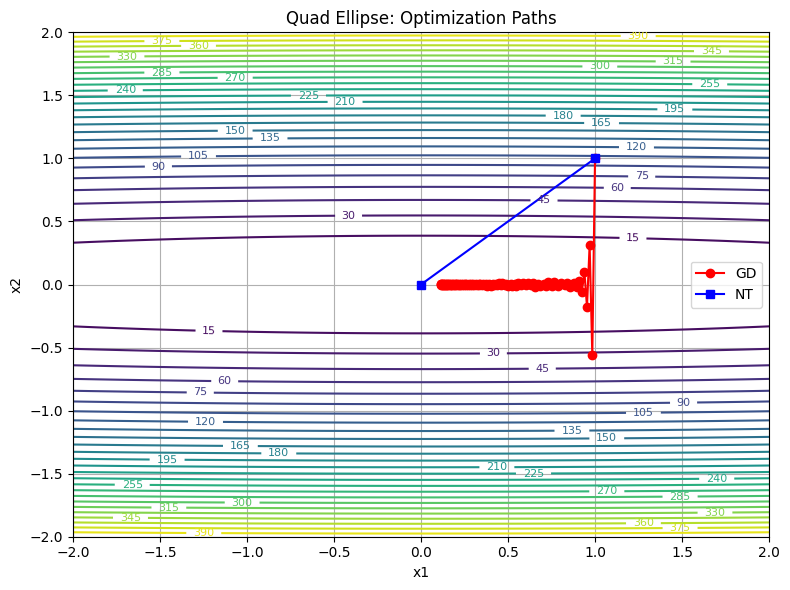

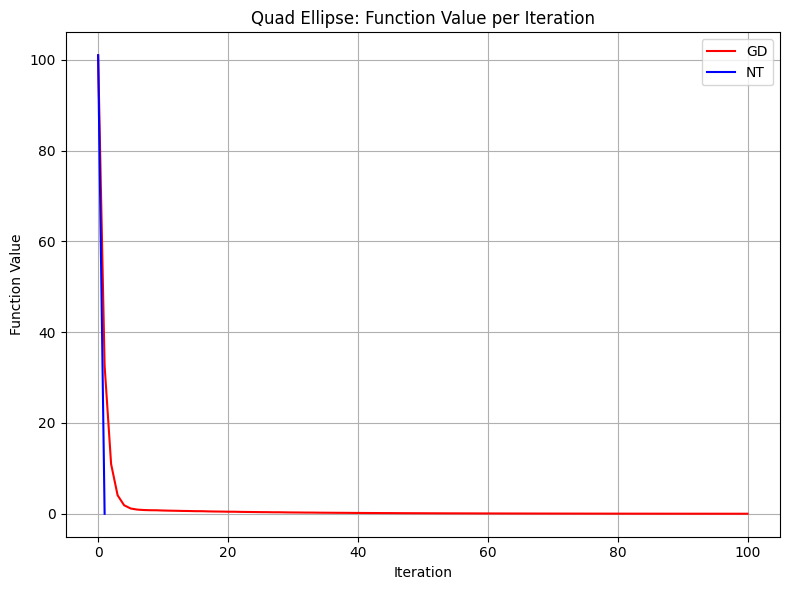

In [12]:
res_gd = minimize(quad_ellipse, x0, method='GD')
res_nt = minimize(quad_ellipse, x0, method='NT')

plot_contours_with_paths(quad_ellipse, (-2, 2), (-2, 2), [res_gd[3], res_nt[3]], ["GD", "NT"], "Quad Ellipse: Optimization Paths")
plot_function_values([res_gd[4], res_nt[4]], ["GD", "NT"], "Quad Ellipse: Function Value per Iteration")

Iter 1: x = [0.49403527 1.26747277], f(x) = 6.047207640907514
Iter 2: x = [0.76213207 1.08842601], f(x) = 3.093362626465863
Iter 3: x = [0.5950772  1.16099326], f(x) = 2.122161050022154
Iter 4: x = [0.67304906 1.09246742], f(x) = 1.7794146463794516
Iter 5: x = [0.61344333 1.10373936], f(x) = 1.6366146117835108
Iter 6: x = [0.63147103 1.0705512 ], f(x) = 1.5581440001453417
Iter 7: x = [0.58067321 1.05503149], f(x) = 1.5103688528534223
Iter 8: x = [0.60460606 1.01949067], f(x) = 1.4239244809838787
Iter 9: x = [0.54858052 1.00906953], f(x) = 1.4050254353781693
Iter 10: x = [0.57946128 0.97052501], f(x) = 1.3048619162058885
Iter 11: x = [0.54821526 0.96817307], f(x) = 1.2464951161810418
Iter 12: x = [0.55604946 0.92350358], f(x) = 1.2008663936681265
Iter 13: x = [0.52083489 0.9243888 ], f(x) = 1.1380454292112336
Iter 14: x = [0.53440088 0.87827232], f(x) = 1.1124065367790443
Iter 15: x = [0.49434365 0.88285548], f(x) = 1.0413573277582366
Iter 16: x = [0.50445484 0.85876364], f(x) = 0.99750

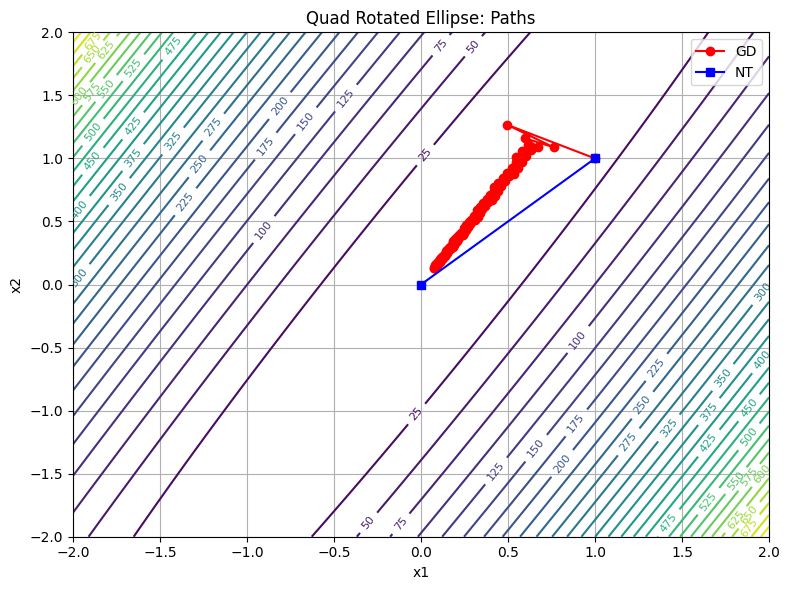

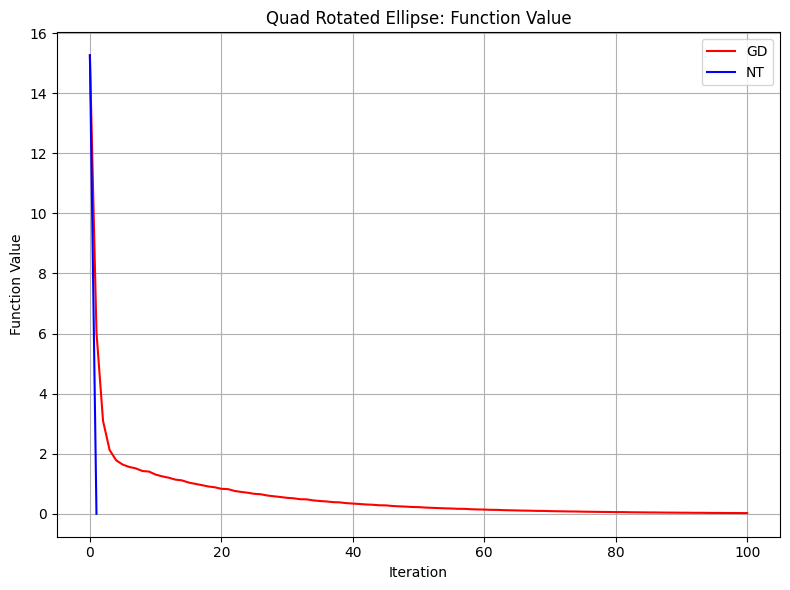

In [13]:
res_gd = minimize(quad_rotated_ellipse, x0, method='GD')
res_nt = minimize(quad_rotated_ellipse, x0, method='NT')

plot_contours_with_paths(quad_rotated_ellipse, (-2, 2), (-2, 2), [res_gd[3], res_nt[3]], ["GD", "NT"], "Quad Rotated Ellipse: Paths")
plot_function_values([res_gd[4], res_nt[4]], ["GD", "NT"], "Quad Rotated Ellipse: Function Value")

Iter 1: x = [-1.38671875  1.8046875 ], f(x) = 7.095948317088187
Iter 2: x = [-1.31797486  1.82779324], f(x) = 6.196300595970412
Iter 3: x = [-1.36016128  1.81007146], f(x) = 5.730099416215155
Iter 4: x = [-1.33431647  1.81787757], f(x) = 5.589486843108889
Iter 5: x = [-1.34929099  1.81055782], f(x) = 5.5292249126781225
Iter 6: x = [-1.33941692  1.81251648], f(x) = 5.507018115911156
Iter 7: x = [-1.34451603  1.80890734], f(x) = 5.496895602978407
Iter 8: x = [-1.34055873  1.80867609], f(x) = 5.491621071183902
Iter 9: x = [-1.34205041  1.80641469], f(x) = 5.488025463217088
Iter 10: x = [-1.33847482  1.80433837], f(x) = 5.4849087583840435
Iter 11: x = [-1.34061216  1.80183378], f(x) = 5.48057467678038
Iter 12: x = [0.87773852 0.88327071], f(x) = 1.2883652213146355
Iter 13: x = [0.95559822 0.83919032], f(x) = 0.5492405239481002
Iter 14: x = [0.90054284 0.86808783], f(x) = 0.33605183478537787
Iter 15: x = [0.94111133 0.84577907], f(x) = 0.16276042180933922
Iter 16: x = [0.91199673 0.86136949

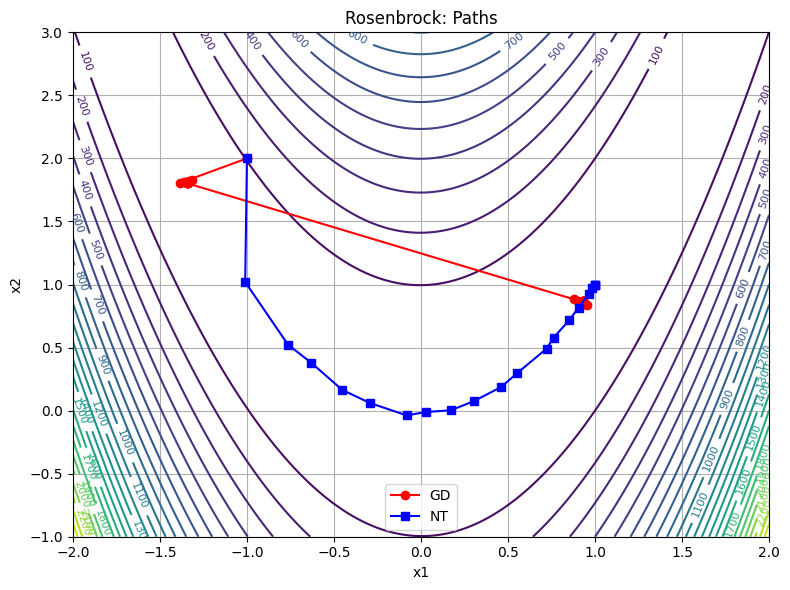

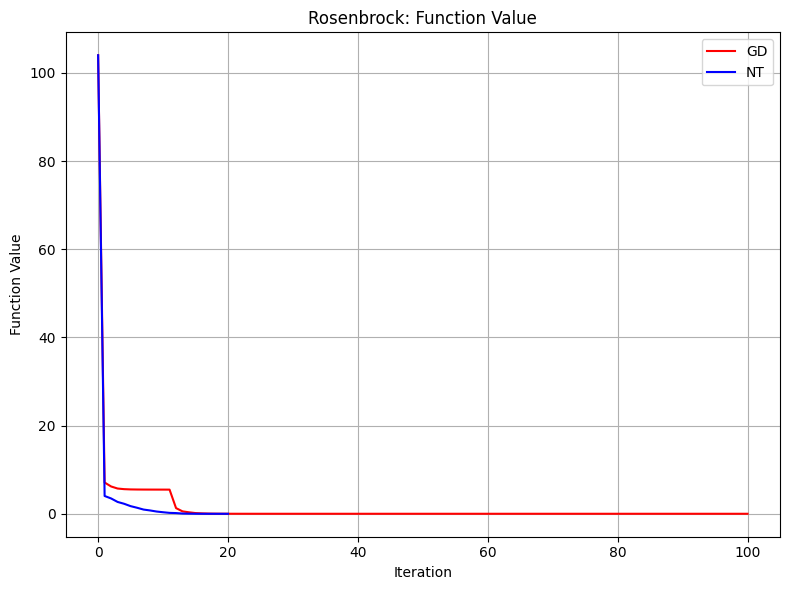

In [14]:
res_gd = minimize(rosenbrock, x0_ros, method='GD', max_iter=100)
res_nt = minimize(rosenbrock, x0_ros, method='NT')

plot_contours_with_paths(rosenbrock, (-2, 2), (-1, 3), [res_gd[3], res_nt[3]], ["GD", "NT"], "Rosenbrock: Paths")
plot_function_values([res_gd[4], res_nt[4]], ["GD", "NT"], "Rosenbrock: Function Value")

Iter 1: x = [   0. -122.], f(x) = -15006.0
Iter 2: x = [  -1. -245.], f(x) = -30136.0
Iter 3: x = [  -2. -368.], f(x) = -45266.0
Iter 4: x = [  -3. -491.], f(x) = -60396.0
Iter 5: x = [  -4. -614.], f(x) = -75526.0
Iter 6: x = [  -5. -737.], f(x) = -90656.0
Iter 7: x = [  -6. -860.], f(x) = -105786.0
Iter 8: x = [  -7. -983.], f(x) = -120916.0
Iter 9: x = [   -8. -1106.], f(x) = -136046.0
Iter 10: x = [   -9. -1229.], f(x) = -151176.0
Iter 11: x = [  -10. -1352.], f(x) = -166306.0
Iter 12: x = [  -11. -1475.], f(x) = -181436.0
Iter 13: x = [  -12. -1598.], f(x) = -196566.0
Iter 14: x = [  -13. -1721.], f(x) = -211696.0
Iter 15: x = [  -14. -1844.], f(x) = -226826.0
Iter 16: x = [  -15. -1967.], f(x) = -241956.0
Iter 17: x = [  -16. -2090.], f(x) = -257086.0
Iter 18: x = [  -17. -2213.], f(x) = -272216.0
Iter 19: x = [  -18. -2336.], f(x) = -287346.0
Iter 20: x = [  -19. -2459.], f(x) = -302476.0
Iter 21: x = [  -20. -2582.], f(x) = -317606.0
Iter 22: x = [  -21. -2705.], f(x) = -332736

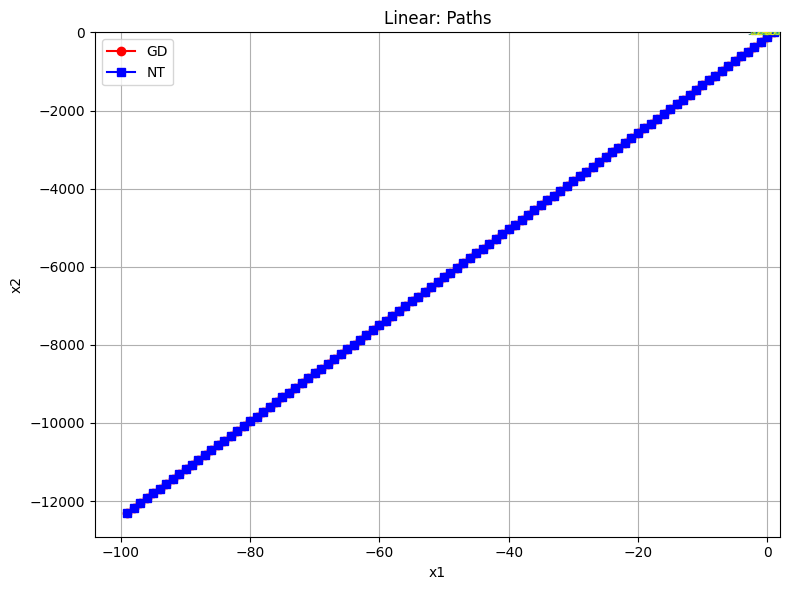

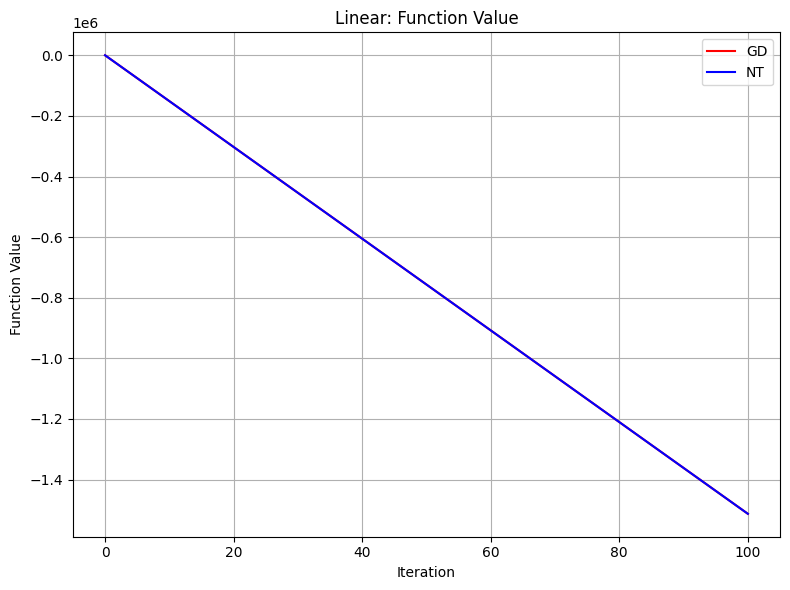

In [15]:
res_gd = minimize(linear, x0, method='GD')
res_nt = minimize(linear, x0, method='NT')

plot_contours_with_paths(linear, (-2, 2), (-2, 2), [res_gd[3], res_nt[3]], ["GD", "NT"], "Linear: Paths")
plot_function_values([res_gd[4], res_nt[4]], ["GD", "NT"], "Linear: Function Value")

Iter 1: x = [ 0.61568723 -0.15499983], f(x) = 4.207136986647966
Iter 2: x = [0.41384817 0.14767997], f(x) = 3.608627075453059
Iter 3: x = [ 0.26308263 -0.08722509], f(x) = 3.1308608545504826
Iter 4: x = [0.04560727 0.14644056], f(x) = 2.9443621119684376
Iter 5: x = [-0.10631371 -0.1757425 ], f(x) = 2.8649258886679885
Iter 6: x = [-0.21284603  0.16107548], f(x) = 2.756312577024725
Iter 7: x = [-0.27752021 -0.11442151], f(x) = 2.646947032467596
Iter 8: x = [-0.30982554  0.06556123], f(x) = 2.58675525676084
Iter 9: x = [-0.32480423 -0.03298525], f(x) = 2.566281496179305
Iter 10: x = [-0.33257003  0.0156242 ], f(x) = 2.5609434243814504
Iter 11: x = [-0.33722825 -0.00719375], f(x) = 2.559679258800953
Iter 12: x = [-0.34025555  0.00326033], f(x) = 2.559379374937506
Iter 13: x = [-0.34228446 -0.00146302], f(x) = 2.5593026160538344
Iter 14: x = [-0.34365814  0.00065219], f(x) = 2.559280029823891
Iter 15: x = [-0.34552411 -0.00123106], f(x) = 2.5592768419957097
Iter 16: x = [-0.34586094  0.0005

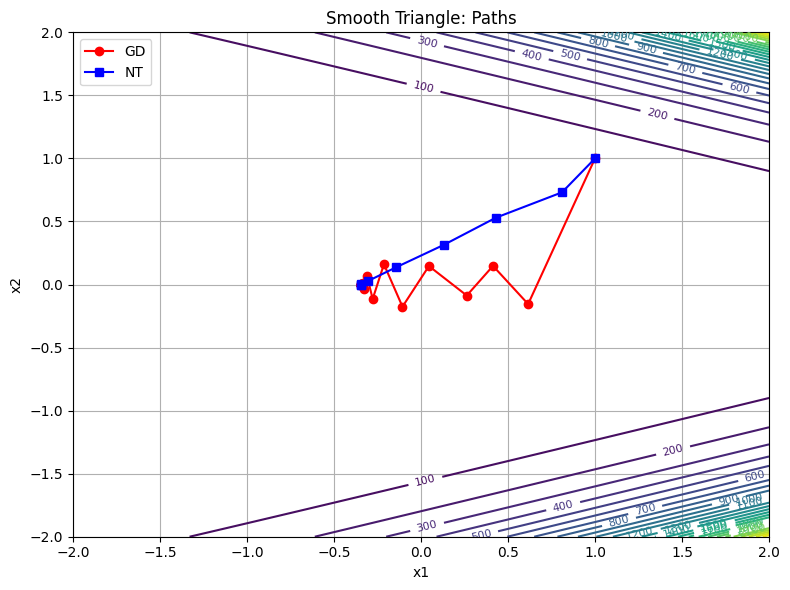

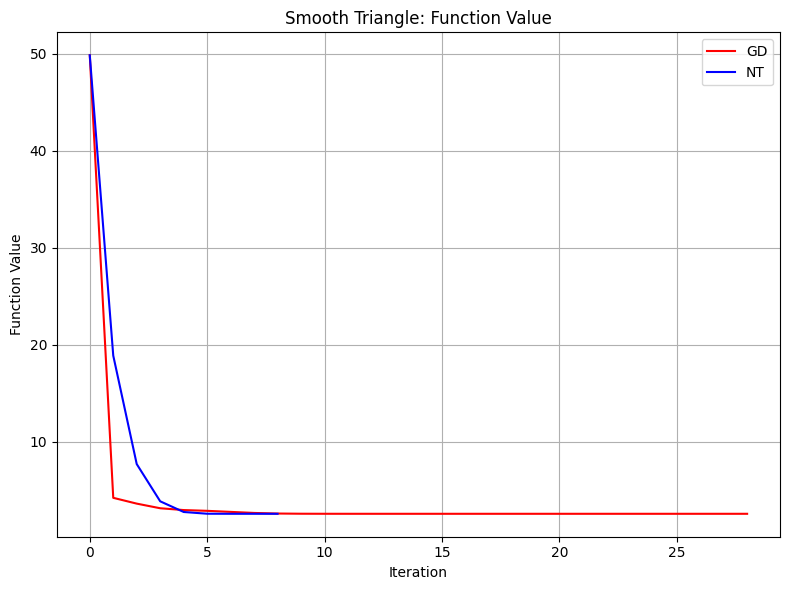

In [16]:
res_gd = minimize(smooth_triangle, x0, method='GD')
res_nt = minimize(smooth_triangle, x0, method='NT')

plot_contours_with_paths(smooth_triangle, (-2, 2), (-2, 2), [res_gd[3], res_nt[3]], ["GD", "NT"], "Smooth Triangle: Paths")
plot_function_values([res_gd[4], res_nt[4]], ["GD", "NT"], "Smooth Triangle: Function Value")

In [17]:
plot_settings = {
    "quad_circle": {
        "xlim": (-2, 2),
        "ylim": (-2, 2),
        "levels": 30  # auto-scaled
    },
    "quad_ellipse": {
        "xlim": (-2, 2),
        "ylim": (-2, 2),
        "levels": 30
    },
    "quad_rotated_ellipse": {
        "xlim": (-2, 2),
        "ylim": (-2, 2),
        "levels": 30
    },
    "rosenbrock": {
        "xlim": (-2, 2),
        "ylim": (-1, 3),
        "levels": np.logspace(0, 3.5, 30)  # good for steep sides
    },
    "linear": {
        "xlim": (-2, 2),
        "ylim": (-130, 2),
        "levels": np.linspace(-5000, 100, 30)
    },
    "smooth_triangle": {
        "xlim": (-2, 2),
        "ylim": (-2, 2),
        "levels": np.logspace(0, 4, 25)
    }
}


In [18]:
functions = {
    "quad_circle": quad_circle,
    "quad_ellipse": quad_ellipse,
    "quad_rotated_ellipse": quad_rotated_ellipse,
    "rosenbrock": rosenbrock,
    "linear": linear,
    "smooth_triangle": smooth_triangle
}

Iter 1: x = [0. 0.], f(x) = 0.0
Iter 2: x = [0. 0.], f(x) = 0.0
Iter 2: x = [0. 0.], f(x) = 0.0


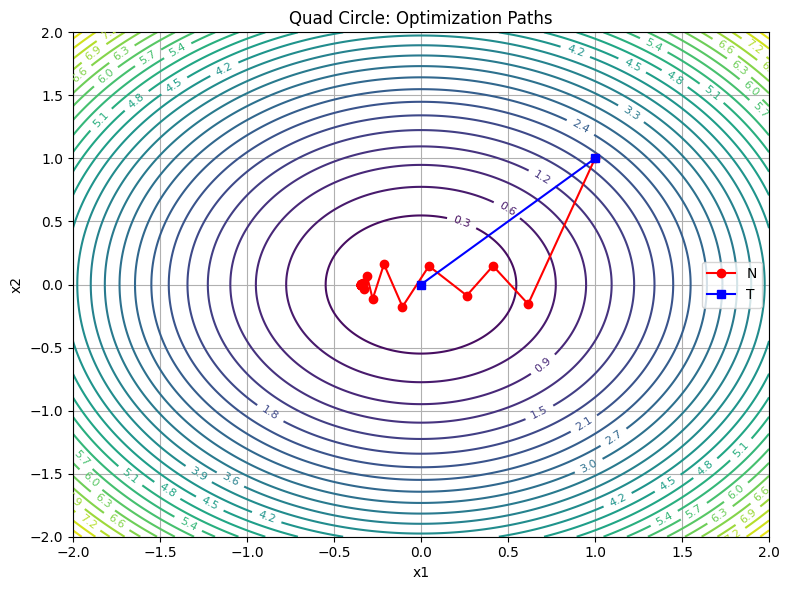

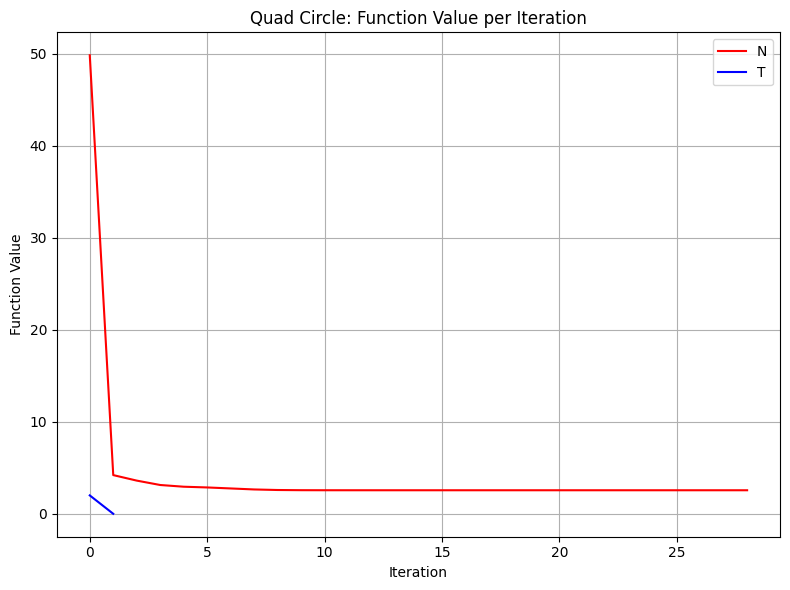

Iter 1: x = [0. 0.], f(x) = 0.0
Iter 2: x = [0. 0.], f(x) = 0.0
Iter 2: x = [0. 0.], f(x) = 0.0


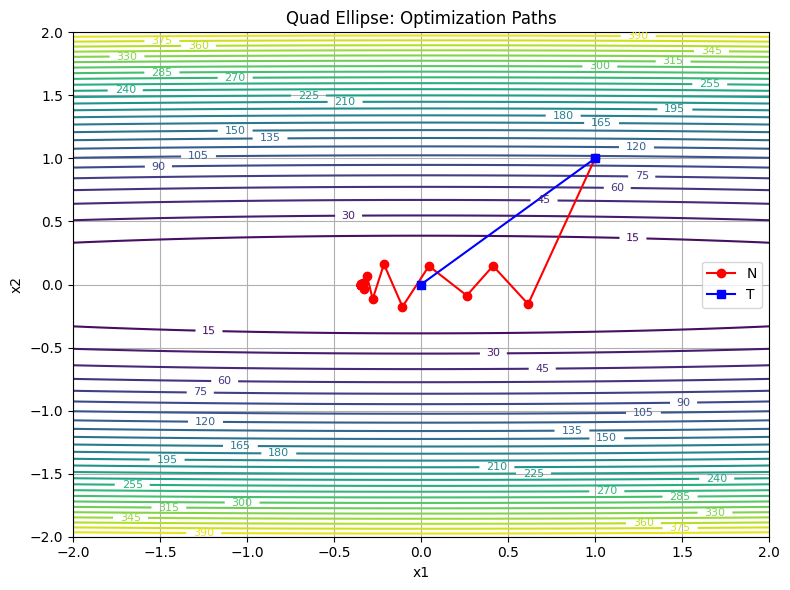

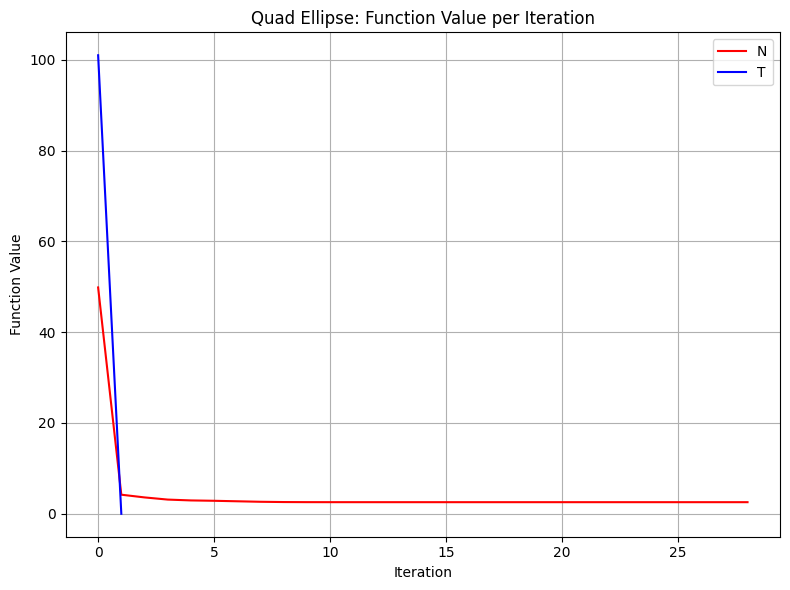

Iter 1: x = [3.33066907e-16 5.55111512e-16], f(x) = 4.308200561857271e-31
Iter 2: x = [2.95822839e-31 4.93038066e-31], f(x) = 3.3985709951003985e-61
Iter 2: x = [2.95822839e-31 4.93038066e-31], f(x) = 3.3985709951003985e-61


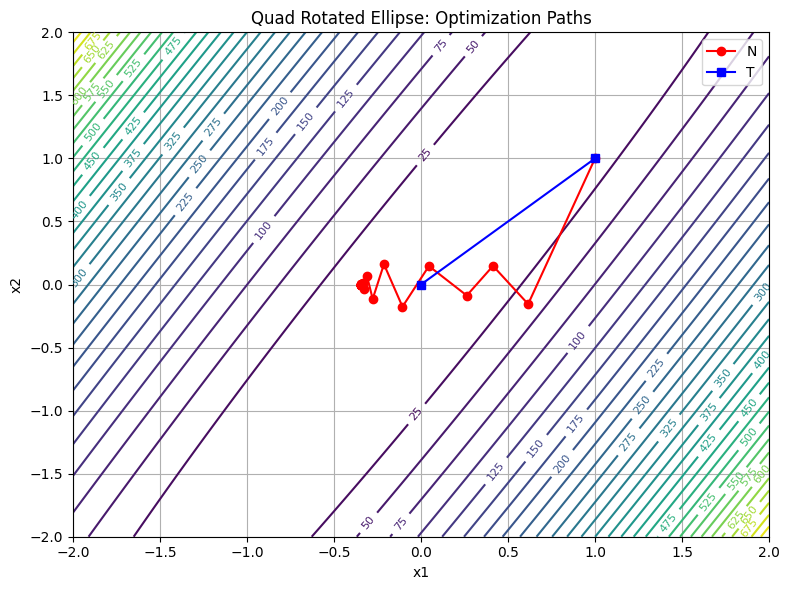

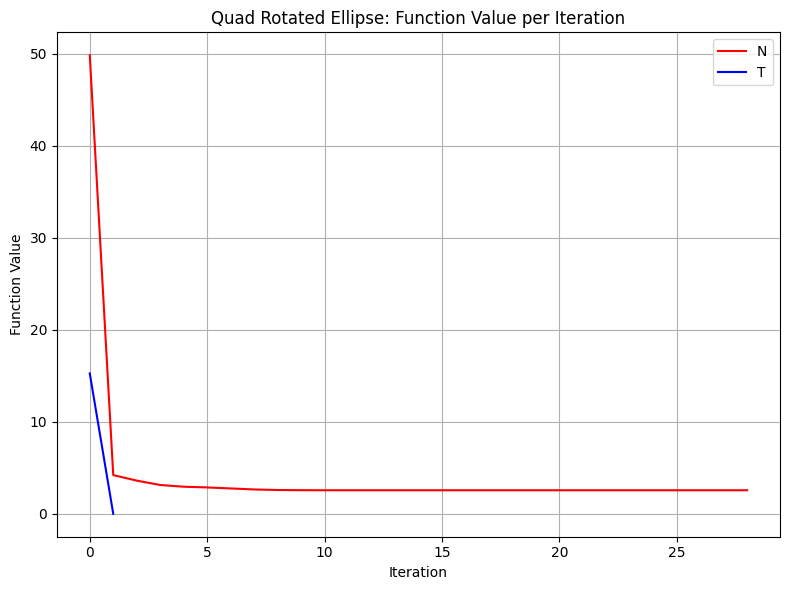

Iter 1: x = [-1.01005025  1.0201005 ], f(x) = 4.040303032827961
Iter 2: x = [-0.76376922  0.52260069], f(x) = 3.479849764878305
Iter 3: x = [-0.62962745  0.37843671], f(x) = 2.6880640731420025
Iter 4: x = [-0.45244792  0.16431953], f(x) = 2.2727368764610283
Iter 5: x = [-0.29245002  0.05992768], f(x) = 1.7359596139391382
Iter 6: x = [-0.08126075 -0.0379976 ], f(x) = 1.3680488880692876
Iter 7: x = [ 0.02773532 -0.0111109 ], f(x) = 0.9594123903784412
Iter 8: x = [0.17173064 0.00281669], f(x) = 0.7571842229388527
Iter 9: x = [0.30247674 0.07439764], f(x) = 0.5157610322859135
Iter 10: x = [0.46032641 0.18698389], f(x) = 0.35333086820221915
Iter 11: x = [0.550523   0.29494015], f(x) = 0.20864808407403557
Iter 12: x = [0.72161644 0.49145732], f(x) = 0.16318804950061488
Iter 13: x = [0.76222915 0.57934388], f(x) = 0.056807028373651154
Iter 14: x = [0.85162486 0.71644861], f(x) = 0.02978787842397451
Iter 15: x = [0.90532059 0.81672213], f(x) = 0.009795493506810636
Iter 16: x = [0.96537173 0.92

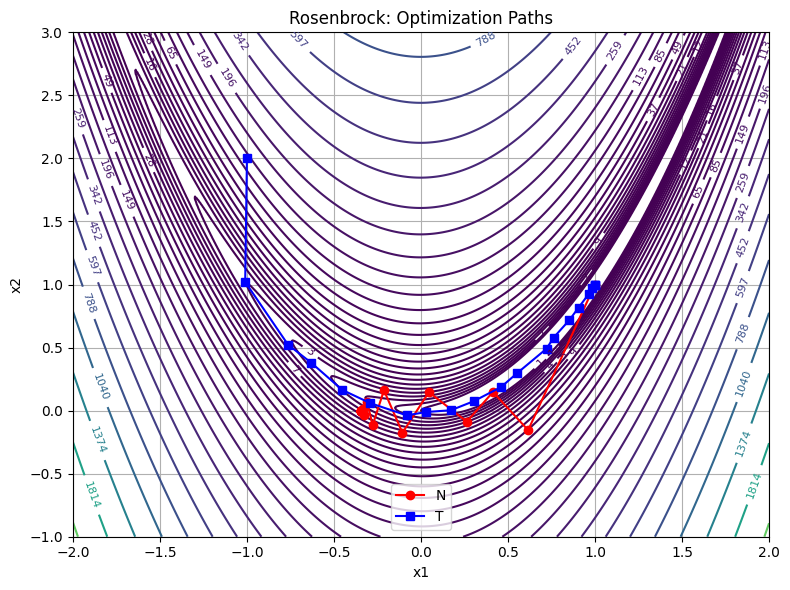

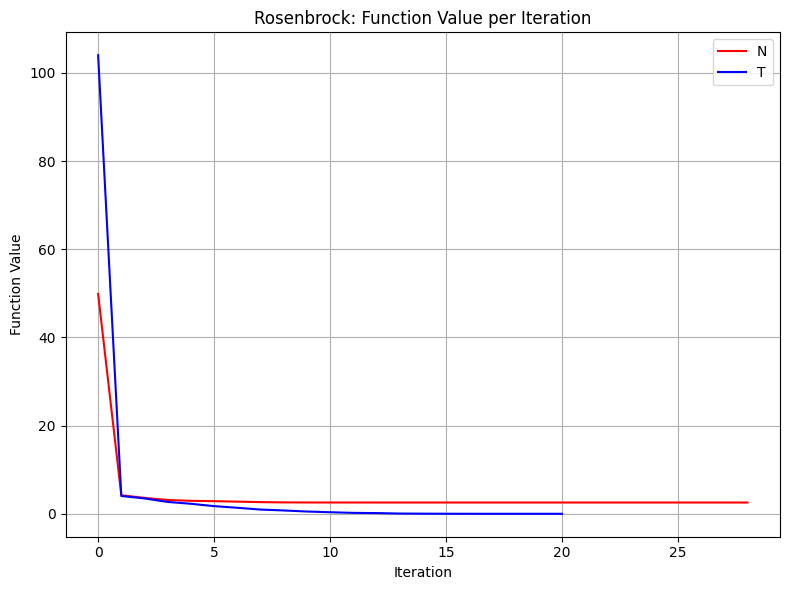

Iter 1: x = [   0. -122.], f(x) = -15006.0
Iter 2: x = [  -1. -245.], f(x) = -30136.0
Iter 3: x = [  -2. -368.], f(x) = -45266.0
Iter 4: x = [  -3. -491.], f(x) = -60396.0
Iter 5: x = [  -4. -614.], f(x) = -75526.0
Iter 6: x = [  -5. -737.], f(x) = -90656.0
Iter 7: x = [  -6. -860.], f(x) = -105786.0
Iter 8: x = [  -7. -983.], f(x) = -120916.0
Iter 9: x = [   -8. -1106.], f(x) = -136046.0
Iter 10: x = [   -9. -1229.], f(x) = -151176.0
Iter 11: x = [  -10. -1352.], f(x) = -166306.0
Iter 12: x = [  -11. -1475.], f(x) = -181436.0
Iter 13: x = [  -12. -1598.], f(x) = -196566.0
Iter 14: x = [  -13. -1721.], f(x) = -211696.0
Iter 15: x = [  -14. -1844.], f(x) = -226826.0
Iter 16: x = [  -15. -1967.], f(x) = -241956.0
Iter 17: x = [  -16. -2090.], f(x) = -257086.0
Iter 18: x = [  -17. -2213.], f(x) = -272216.0
Iter 19: x = [  -18. -2336.], f(x) = -287346.0
Iter 20: x = [  -19. -2459.], f(x) = -302476.0
Iter 21: x = [  -20. -2582.], f(x) = -317606.0
Iter 22: x = [  -21. -2705.], f(x) = -332736

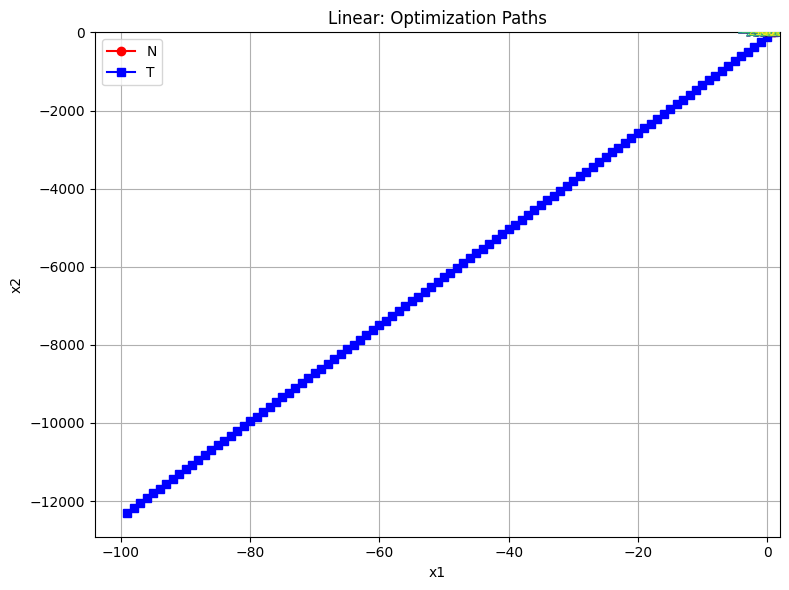

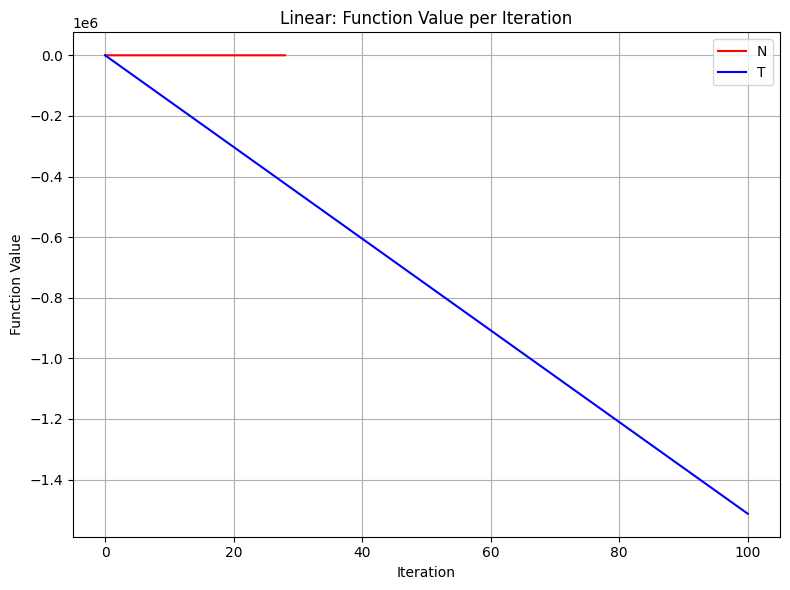

Iter 1: x = [0.81041242 0.73119842], f(x) = 18.87640039338445
Iter 2: x = [0.42996516 0.5297541 ], f(x) = 7.68817000702824
Iter 3: x = [0.13127613 0.31467695], f(x) = 3.84691844281961
Iter 4: x = [-0.1434178   0.13647681], f(x) = 2.745523139673568
Iter 5: x = [-0.30437435  0.02796361], f(x) = 2.566245432396088
Iter 6: x = [-0.3447942   0.00119306], f(x) = 2.5592789592267895
Iter 7: x = [-3.46570386e-01  2.12417725e-06], f(x) = 2.559266696697338
Iter 8: x = [-3.46573590e-01  6.80689653e-12], f(x) = 2.5592666966582156
Iter 9: x = [-3.46573590e-01 -7.26375117e-18], f(x) = 2.5592666966582156
Iter 9: x = [-3.46573590e-01 -7.26375117e-18], f(x) = 2.5592666966582156


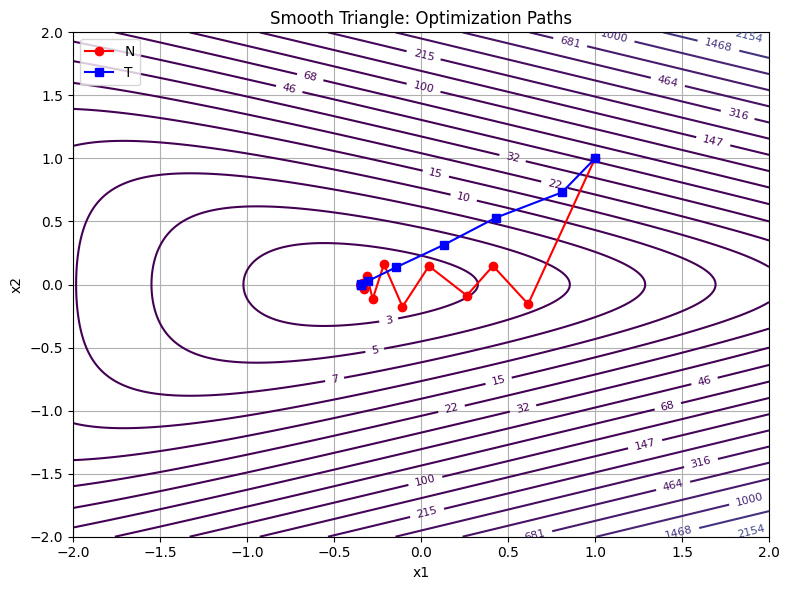

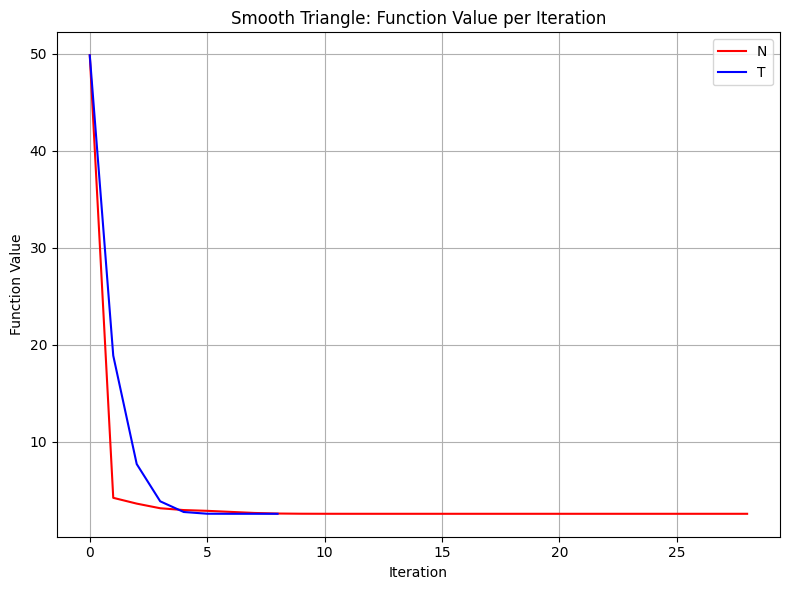

Iter 1: x = [0.81041242 0.73119842], f(x) = 18.87640039338445
Iter 2: x = [0.42996516 0.5297541 ], f(x) = 7.68817000702824
Iter 3: x = [0.13127613 0.31467695], f(x) = 3.84691844281961
Iter 4: x = [-0.1434178   0.13647681], f(x) = 2.745523139673568
Iter 5: x = [-0.30437435  0.02796361], f(x) = 2.566245432396088
Iter 6: x = [-0.3447942   0.00119306], f(x) = 2.5592789592267895
Iter 7: x = [-3.46570386e-01  2.12417725e-06], f(x) = 2.559266696697338
Iter 8: x = [-3.46573590e-01  6.80689653e-12], f(x) = 2.5592666966582156
Iter 9: x = [-3.46573590e-01 -7.26375117e-18], f(x) = 2.5592666966582156
Iter 9: x = [-3.46573590e-01 -7.26375117e-18], f(x) = 2.5592666966582156


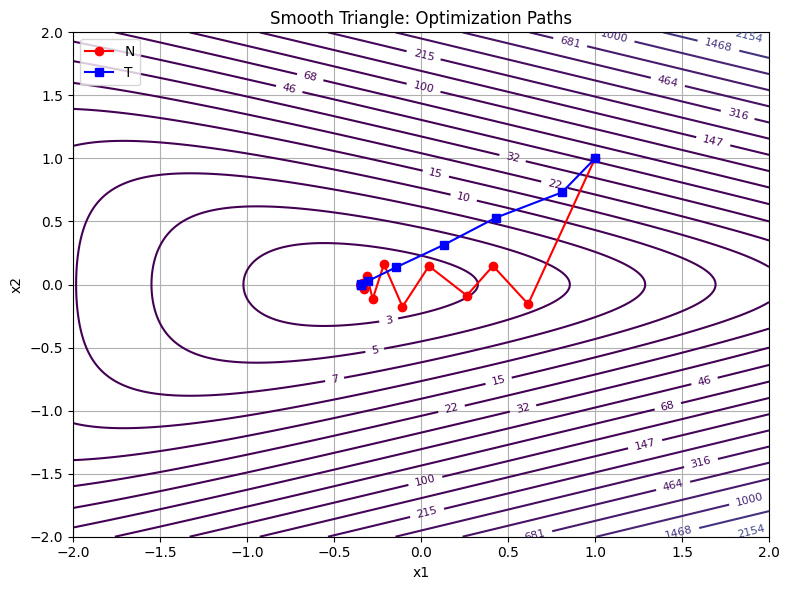

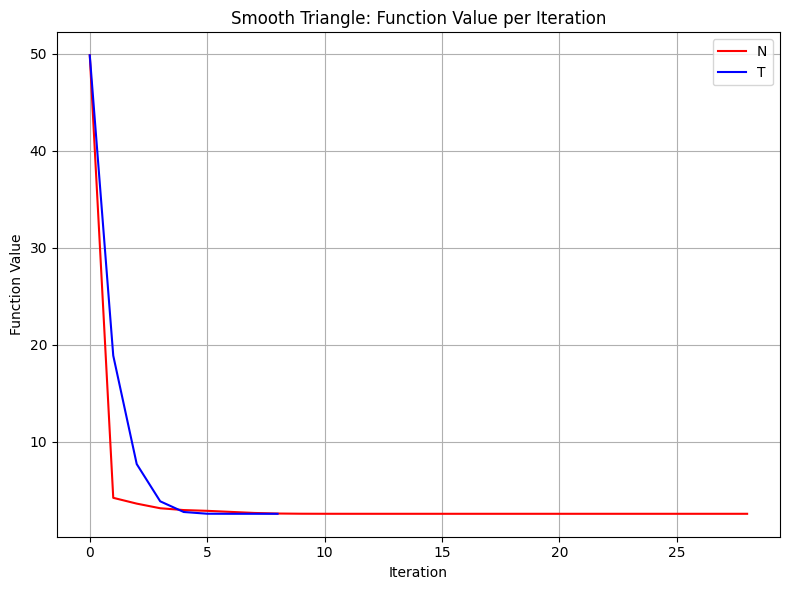

In [19]:
names = ["quad_circle", "quad_ellipse", "quad_rotated_ellipse", "rosenbrock", "linear", "smooth_triangle"]
for name in names:
    func = functions[name]
    settings = plot_settings[name]
    #res_gd = minimize(func, [-1.0, 2.0] if name == "rosenbrock" else [1.0, 1.0], method='GD', max_iter=10000 if name == "rosenbrock" else 100)
    res_nt = minimize(func, [-1.0, 2.0] if name == "rosenbrock" else [1.0, 1.0], method='NT')

    plot_contours_with_paths(
        f=func,
        xlim=settings["xlim"],
        ylim=settings["ylim"],
        levels=settings["levels"],
        paths=[res_gd[3], res_nt[3]],
        labels="NT",
        title=f"{name.replace('_', ' ').title()}: Optimization Paths"
    )
    plot_function_values(
        f_paths=[res_gd[4], res_nt[4]],
        labels="NT",
        title=f"{name.replace('_', ' ').title()}: Function Value per Iteration"
    )
func = functions[name]
settings = plot_settings[name]
#res_gd = minimize(func, [-1.0, 2.0] if name == "rosenbrock" else [1.0, 1.0], method='GD', max_iter=10000 if name == "rosenbrock" else 100)
res_nt = minimize(func, [-1.0, 2.0] if name == "rosenbrock" else [1.0, 1.0], method='NT')

plot_contours_with_paths(
    f=func,
    xlim=settings["xlim"],
    ylim=settings["ylim"],
    levels=settings["levels"],
    paths=[res_gd[3], res_nt[3]],
    labels="NT",
    title=f"{name.replace('_', ' ').title()}: Optimization Paths"
)
plot_function_values(
    f_paths=[res_gd[4], res_nt[4]],
    labels="NT",
    title=f"{name.replace('_', ' ').title()}: Function Value per Iteration"
)